In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
from textblob import TextBlob
from wordcloud import WordCloud
import seaborn as sns
import cufflinks as cf
%matplotlib inline
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
cf.go_offline();
import plotly.graph_objs as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

pd.set_option('display.max_columns',None)

import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('Amazon.csv')

In [3]:
df1.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4,No issues.,23-07-2014,138,0,0,0,0,0.0,0.0
1,1,0mie,5,"Purchased this for my device, it worked as adv...",25-10-2013,409,0,0,0,0,0.0,0.0
2,2,1K3,4,it works as expected. I should have sprung for...,23-12-2012,715,0,0,0,0,0.0,0.0
3,3,1m2,5,This think has worked out great.Had a diff. br...,21-11-2013,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",13-07-2013,513,0,0,0,0,0.0,0.0


In [4]:
df1.head()
df1.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df1.head()

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,NaN,4,No issues.,23-07-2014,138,0,0,0,0,0.0,0.0
1,0mie,5,"Purchased this for my device, it worked as adv...",25-10-2013,409,0,0,0,0,0.0,0.0
2,1K3,4,it works as expected. I should have sprung for...,23-12-2012,715,0,0,0,0,0.0,0.0
3,1m2,5,This think has worked out great.Had a diff. br...,21-11-2013,382,0,0,0,0,0.0,0.0
4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",13-07-2013,513,0,0,0,0,0.0,0.0


In [6]:
df1.isnull().sum()

reviewerName            1
overall                 0
reviewText              1
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
dtype: int64

In [7]:
df1['overall'].value_counts()

overall
5    3922
4     527
1     244
3     142
2      80
Name: count, dtype: int64

In [8]:
df2 = df1.dropna()

In [9]:
df2.isnull().sum()

reviewerName            0
overall                 0
reviewText              0
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
dtype: int64

In [10]:
df2.duplicated().sum()

0

In [11]:
df2.dtypes

reviewerName             object
overall                   int64
reviewText               object
reviewTime               object
day_diff                  int64
helpful_yes               int64
helpful_no                int64
total_vote                int64
score_pos_neg_diff        int64
score_average_rating    float64
wilson_lower_bound      float64
dtype: object

In [12]:
df3 = df2[['overall','day_diff','helpful_yes','helpful_no','total_vote','score_pos_neg_diff',
    'score_average_rating','wilson_lower_bound']]

In [13]:
print(df3.quantile([0,0.05,0.50,0.95,0.99,1]).T)

                       0.00  0.05   0.50        0.95       0.99         1.00
overall                 1.0   2.0    5.0    5.000000    5.00000     5.000000
day_diff                1.0  98.0  431.0  747.400000  943.00000  1064.000000
helpful_yes             0.0   0.0    0.0    1.000000    3.00000  1952.000000
helpful_no              0.0   0.0    0.0    0.000000    2.00000   183.000000
total_vote              0.0   0.0    0.0    1.000000    4.00000  2020.000000
score_pos_neg_diff   -130.0   0.0    0.0    1.000000    2.00000  1884.000000
score_average_rating    0.0   0.0    0.0    1.000000    1.00000     1.000000
wilson_lower_bound      0.0   0.0    0.0    0.206549    0.34238     0.957544


In [14]:
df2.reviewText.nunique()

4912

In [15]:
df2.reviewText.value_counts().unique()

array([2, 1], dtype=int64)

In [16]:
data = {'column_name': [1, 2, 3, 1, 2, 4, 5, 1]}

In [17]:
df = pd.DataFrame(data)

In [18]:
df

,column_name
0,1
1,2
2,3
3,1
4,2
5,4
6,5
7,1


In [19]:
unique_values = df['column_name'].unique()

In [20]:
print("Unique Values:", unique_values)


Unique Values: [1 2 3 4 5]


In [21]:
num_unique_values = df['column_name'].nunique()

In [22]:
print("Number of Unique Values:", num_unique_values)

Number of Unique Values: 5


In [23]:
for i in df2.columns:
    print(df2[i].nunique())

4593
5
4912
689
689
23
17
26
27
28
40


In [24]:
def check_class(df):
    nuniue_df = pd.DataFrame({'Variable':df.columns,
                              'Classes':[df[i].nunique() for i in df.columns]})
    nuniue_df = nuniue_df.sort_values('Classes',ascending=False)
    nuniue_df = nuniue_df.reset_index(drop=True)
    return nuniue_df
    

In [26]:
check_class(df2)

,Variable,Classes
0,reviewText,4912
1,reviewerName,4593
2,reviewTime,689
3,day_diff,689
4,wilson_lower_bound,40
5,score_average_rating,28
6,score_pos_neg_diff,27
7,total_vote,26
8,helpful_yes,23
9,helpful_no,17


In [27]:
overall_count = df2['overall'].value_counts()

In [28]:
overall_count

overall
5    3921
4     526
1     244
3     142
2      80
Name: count, dtype: int64

In [29]:
overall_count.values

array([3921,  526,  244,  142,   80], dtype=int64)

In [30]:
overall_count.index

Index([5, 4, 1, 3, 2], dtype='int64', name='overall')

In [31]:
for i in overall_count.index:
    print(overall_count[i])

3921
526
244
142
80


In [32]:
for i ,value in enumerate(overall_count):
    print(value)

3921
526
244
142
80


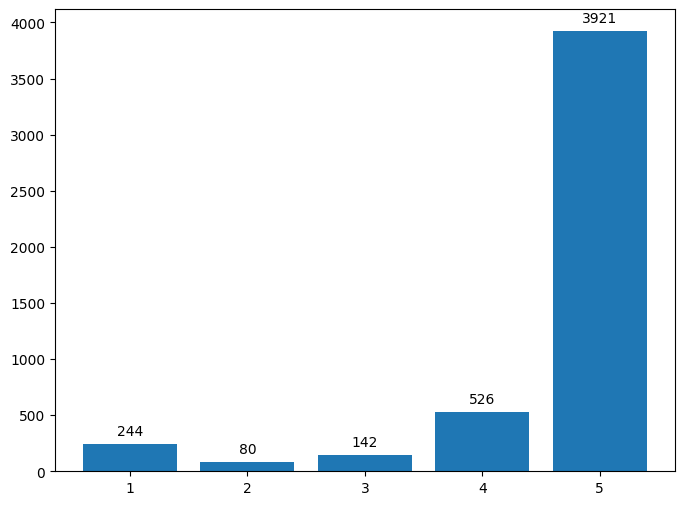

In [33]:
plt.figure(figsize=(8,6))
plt.bar(overall_count.index,overall_count.values,)

for i ,value in enumerate(overall_count):
    plt.text(overall_count.index[i],value + 50 ,str(value),ha='center' , va='bottom')

In [34]:
overall_count.keys()

Index([5, 4, 1, 3, 2], dtype='int64', name='overall')

In [35]:
overall_count.value_counts().keys()

Index([3921, 526, 244, 142, 80], dtype='int64', name='count')

In [36]:
overall_count.value_counts().values

array([1, 1, 1, 1, 1], dtype=int64)

In [37]:
for i ,value in enumerate(overall_count):
    # plt.text(overall_count.index[i],value + 50 ,str(value),ha='center' , va='bottom')
    print(i,value)

0 3921
1 526
2 244
3 142
4 80


In [38]:
overall_count.value_counts().keys()

Index([3921, 526, 244, 142, 80], dtype='int64', name='count')

In [39]:
values = overall_count.value_counts().keys()

In [40]:
total = sum(values)
percantage = [(i/total) * 100 for i in values]

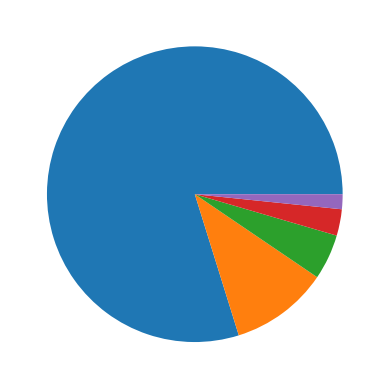

In [41]:
plt.pie(overall_count.value_counts().keys())
plt.show()

In [42]:
percantage

[79.80867087319356,
 10.706289436189701,
 4.966415631996743,
 2.8902910645226947,
 1.628332994097293]

In [43]:
labels = ['Label 1', 'Label 2', 'Label 3','Label 4','Label 5']

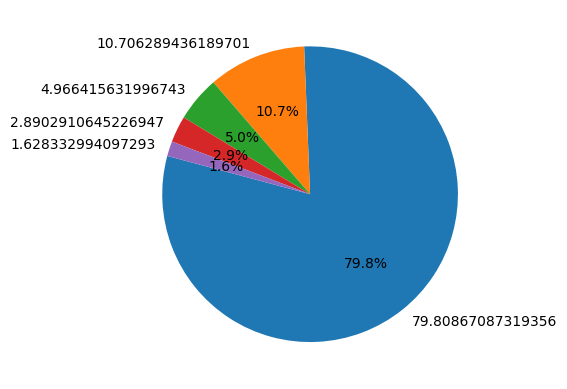

In [44]:
plt.pie(percantage ,autopct='%1.1f%%',startangle=165,labels=percantage)
plt.show()

In [45]:
79.80867087319356 * 100 

7980.867087319356

In [46]:
round(7980.867087319356)

7981

In [47]:
decimal_number = 79.80867087319356
round_decimal = round(decimal_number,1)

formate_peracanatage = "{}%".format(round_decimal)

In [48]:
round_decimal

79.8

In [49]:
formate_peracanatage

'79.8%'

In [50]:
percantage_list = []
for i in percantage:
    decimal_number = i
    round_decimal = round(decimal_number,1)
    formate_peracanatage = "{}%".format(round_decimal)
    percantage_list.append(formate_peracanatage)

In [51]:
percantage_list

['79.8%', '10.7%', '5.0%', '2.9%', '1.6%']

In [52]:
overall_count.index

Index([5, 4, 1, 3, 2], dtype='int64', name='overall')

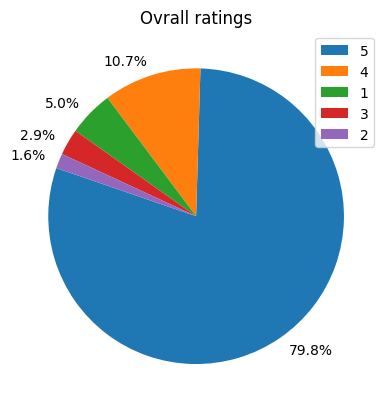

In [53]:
plt.pie(percantage,labels=percantage_list,startangle=161)
legend_texts = overall_count.index
plt.legend(legend_texts,loc=1)
plt.title("Ovrall ratings")
plt.show()

In [54]:
df2.reviewText.head()

1    Purchased this for my device, it worked as adv...
2    it works as expected. I should have sprung for...
3    This think has worked out great.Had a diff. br...
4    Bought it with Retail Packaging, arrived legit...
5    It's mini storage.  It doesn't do anything els...
Name: reviewText, dtype: object

In [55]:
len(df2.reviewText)

4913

In [56]:
review_example = df2.reviewText[2031]

In [57]:
review_example

'[[ UPDATE - 6/19/2014 ]]So my lovely wife bought me a Samsung Galaxy Tab 4 for Father\'s Day and I\'ve been loving it ever since.  Just as other with Samsung products, the Galaxy Tab 4 has the ability to add a microSD card to expand the memory on the device.  Since it\'s been over a year, I decided to do some more research to see if SanDisk offered anything new.  As of 6/19/2014, their product lineup for microSD cards from worst to best (performance-wise) are the as follows:SanDiskSanDisk UltraSanDisk Ultra PLUSSanDisk ExtremeSanDisk Extreme PLUSSanDisk Extreme PRONow, the difference between all of these cards are simply the speed in which you can read/write data to the card.  Yes, the published rating of most all these cards (except the SanDisk regular) are Class 10/UHS-I but that\'s just a rating... Actual real world performance does get better with each model, but with faster cards come more expensive prices.  Since Amazon doesn\'t carry the Ultra PLUS model of microSD card, I had 

In [58]:
review_example = re.sub("[^a-zA-Z]",' ',review_example)

In [59]:
review_example

'   UPDATE               So my lovely wife bought me a Samsung Galaxy Tab   for Father s Day and I ve been loving it ever since   Just as other with Samsung products  the Galaxy Tab   has the ability to add a microSD card to expand the memory on the device   Since it s been over a year  I decided to do some more research to see if SanDisk offered anything new   As of            their product lineup for microSD cards from worst to best  performance wise  are the as follows SanDiskSanDisk UltraSanDisk Ultra PLUSSanDisk ExtremeSanDisk Extreme PLUSSanDisk Extreme PRONow  the difference between all of these cards are simply the speed in which you can read write data to the card   Yes  the published rating of most all these cards  except the SanDisk regular  are Class    UHS I but that s just a rating    Actual real world performance does get better with each model  but with faster cards come more expensive prices   Since Amazon doesn t carry the Ultra PLUS model of microSD card  I had to do

In [60]:
review_example = review_example.lower().split()

In [61]:
review_example

['update',
 'so',
 'my',
 'lovely',
 'wife',
 'bought',
 'me',
 'a',
 'samsung',
 'galaxy',
 'tab',
 'for',
 'father',
 's',
 'day',
 'and',
 'i',
 've',
 'been',
 'loving',
 'it',
 'ever',
 'since',
 'just',
 'as',
 'other',
 'with',
 'samsung',
 'products',
 'the',
 'galaxy',
 'tab',
 'has',
 'the',
 'ability',
 'to',
 'add',
 'a',
 'microsd',
 'card',
 'to',
 'expand',
 'the',
 'memory',
 'on',
 'the',
 'device',
 'since',
 'it',
 's',
 'been',
 'over',
 'a',
 'year',
 'i',
 'decided',
 'to',
 'do',
 'some',
 'more',
 'research',
 'to',
 'see',
 'if',
 'sandisk',
 'offered',
 'anything',
 'new',
 'as',
 'of',
 'their',
 'product',
 'lineup',
 'for',
 'microsd',
 'cards',
 'from',
 'worst',
 'to',
 'best',
 'performance',
 'wise',
 'are',
 'the',
 'as',
 'follows',
 'sandisksandisk',
 'ultrasandisk',
 'ultra',
 'plussandisk',
 'extremesandisk',
 'extreme',
 'plussandisk',
 'extreme',
 'pronow',
 'the',
 'difference',
 'between',
 'all',
 'of',
 'these',
 'cards',
 'are',
 'simply',
 

In [62]:
rt = lambda x:re.sub("[^a-zA-Z]",' ',str(x))

In [63]:
df2['reviewText'] = df2['reviewText'].map(rt)
df2['reviewText'] = df2['reviewText'].str.lower()

In [64]:
df2.head()

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
1,0mie,5,purchased this for my device it worked as adv...,25-10-2013,409,0,0,0,0,0.0,0.0
2,1K3,4,it works as expected i should have sprung for...,23-12-2012,715,0,0,0,0,0.0,0.0
3,1m2,5,this think has worked out great had a diff br...,21-11-2013,382,0,0,0,0,0.0,0.0
4,2&amp;1/2Men,5,bought it with retail packaging arrived legit...,13-07-2013,513,0,0,0,0,0.0,0.0
5,2Cents!,5,it s mini storage it doesn t do anything els...,29-04-2013,588,0,0,0,0,0.0,0.0


In [65]:
len(df2)

4913

In [66]:
df1

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,NaN,4,No issues.,23-07-2014,138,0,0,0,0,0.0,0.0
1,0mie,5,"Purchased this for my device, it worked as adv...",25-10-2013,409,0,0,0,0,0.0,0.0
2,1K3,4,it works as expected. I should have sprung for...,23-12-2012,715,0,0,0,0,0.0,0.0
3,1m2,5,This think has worked out great.Had a diff. br...,21-11-2013,382,0,0,0,0,0.0,0.0
4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",13-07-2013,513,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4910,"ZM ""J""",1,I bought this Sandisk 16GB Class 10 to use wit...,23-07-2013,503,0,0,0,0,0.0,0.0
4911,Zo,5,Used this for extending the capabilities of my...,22-08-2013,473,0,0,0,0,0.0,0.0
4912,Z S Liske,5,Great card that is very fast and reliable. It ...,31-03-2014,252,0,0,0,0,0.0,0.0
4913,Z Taylor,5,Good amount of space for the stuff I want to d...,16-09-2013,448,0,0,0,0,0.0,0.0


In [73]:
a = df2['reviewText'].values

In [74]:
a

array(['purchased this for my device  it worked as advertised  you can never have too much phone memory  since i download a lot of stuff this was a no brainer for me ',
       'it works as expected  i should have sprung for the higher capacity   i think its made a bit cheesier than the earlier versions  the paint looks not as clean as before',
       'this think has worked out great had a diff  bran   gb card and if went south after   months this one has held up pretty well since i had my s   now on my note      update        i ve had this for a few months and have had zero issue s since it was transferred from my s  to my note  and into a note   this card is reliable and solid cheers ',
       ...,
       'great card that is very fast and reliable  it comes with an optional adapter for sd slots  being that this is a class    card it transfers data really fast and for video this is a must  great for gopros and other small cameras alike ',
       'good amount of space for the stuff i wa

In [78]:
textblob_objective = [TextBlob(i) for i in a]

In [79]:
textblob_objective

[TextBlob("purchased this for my device  it worked as advertised  you can never have too much phone memory  since i download a lot of stuff this was a no brainer for me "),
 TextBlob("it works as expected  i should have sprung for the higher capacity   i think its made a bit cheesier than the earlier versions  the paint looks not as clean as before"),
 TextBlob("this think has worked out great had a diff  bran   gb card and if went south after   months this one has held up pretty well since i had my s   now on my note      update        i ve had this for a few months and have had zero issue s since it was transferred from my s  to my note  and into a note   this card is reliable and solid cheers "),
 TextBlob("bought it with retail packaging  arrived legit  in a orange envelope  english version not asian like the picture shows  arrived quickly  bought a    and    both retail packaging for my htc one sv and lg optimus  both cards in working order  probably best price you ll get for a ni

In [80]:
sentiment_scores = [blob.sentiment.polarity for blob in textblob_objective]

In [81]:
sentiment_scores

[0.2,
 0.12916666666666668,
 0.21250000000000002,
 0.3866666666666666,
 -0.025,
 0.2333333333333333,
 0.08541666666666667,
 0.1,
 0.23333333333333336,
 0.33442176870748297,
 -0.03333333333333333,
 0.0,
 0.22285714285714286,
 -0.03571428571428571,
 0.017857142857142856,
 0.07857142857142858,
 0.2955882352941177,
 0.3972222222222222,
 0.0,
 0.13238095238095235,
 0.3875,
 0.5666666666666667,
 0.46249999999999997,
 0.10416666666666666,
 0.4166666666666667,
 0.0,
 0.39428571428571424,
 0.8,
 0.11785714285714285,
 0.3,
 0.07756410256410257,
 0.125,
 0.7333333333333334,
 0.25,
 0.20000000000000004,
 0.03,
 0.75,
 0.27396464646464647,
 0.11875,
 0.2770833333333333,
 0.30000000000000004,
 0.02812500000000001,
 0.08234126984126983,
 0.06250000000000003,
 0.42916666666666664,
 0.1772727272727273,
 -0.0625,
 0.6428571428571428,
 0.0906060606060606,
 0.3,
 0.4444444444444444,
 0.4888888888888889,
 0.25952380952380955,
 0.26212301587301584,
 0.13888888888888892,
 0.009375000000000001,
 0.01111111111

In [75]:
m = TextBlob(a)

TypeError: The `text` argument passed to `__init__(text)` must be a string, not <class 'numpy.ndarray'>

In [82]:
df2[['polarity','subjectivity']] = df2['reviewText'].apply(lambda Text:pd.Series(TextBlob(Text).sentiment))

In [83]:
df2

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound,polarity,subjectivity
1,0mie,5,purchased this for my device it worked as adv...,25-10-2013,409,0,0,0,0,0.0,0.0,0.200000,0.200000
2,1K3,4,it works as expected i should have sprung for...,23-12-2012,715,0,0,0,0,0.0,0.0,0.129167,0.525000
3,1m2,5,this think has worked out great had a diff br...,21-11-2013,382,0,0,0,0,0.0,0.0,0.212500,0.487500
4,2&amp;1/2Men,5,bought it with retail packaging arrived legit...,13-07-2013,513,0,0,0,0,0.0,0.0,0.386667,0.360000
5,2Cents!,5,it s mini storage it doesn t do anything els...,29-04-2013,588,0,0,0,0,0.0,0.0,-0.025000,0.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4910,"ZM ""J""",1,i bought this sandisk gb class to use wit...,23-07-2013,503,0,0,0,0,0.0,0.0,0.183333,0.393056
4911,Zo,5,used this for extending the capabilities of my...,22-08-2013,473,0,0,0,0,0.0,0.0,0.800000,0.750000
4912,Z S Liske,5,great card that is very fast and reliable it ...,31-03-2014,252,0,0,0,0,0.0,0.0,0.280833,0.609167
4913,Z Taylor,5,good amount of space for the stuff i want to d...,16-09-2013,448,0,0,0,0,0.0,0.0,0.600000,0.550000


In [97]:
for i,row  in df2.iterrows():
    review_text = row['reviewText']
    print(review_text)
    

purchased this for my device  it worked as advertised  you can never have too much phone memory  since i download a lot of stuff this was a no brainer for me 
it works as expected  i should have sprung for the higher capacity   i think its made a bit cheesier than the earlier versions  the paint looks not as clean as before
this think has worked out great had a diff  bran   gb card and if went south after   months this one has held up pretty well since i had my s   now on my note      update        i ve had this for a few months and have had zero issue s since it was transferred from my s  to my note  and into a note   this card is reliable and solid cheers 
bought it with retail packaging  arrived legit  in a orange envelope  english version not asian like the picture shows  arrived quickly  bought a    and    both retail packaging for my htc one sv and lg optimus  both cards in working order  probably best price you ll get for a nice sd card
it s mini storage   it doesn t do anything

In [115]:
df2['reviewText']

1       purchased this for my device  it worked as adv...
2       it works as expected  i should have sprung for...
3       this think has worked out great had a diff  br...
4       bought it with retail packaging  arrived legit...
5       it s mini storage   it doesn t do anything els...
                              ...                        
4910    i bought this sandisk   gb class    to use wit...
4911    used this for extending the capabilities of my...
4912    great card that is very fast and reliable  it ...
4913    good amount of space for the stuff i want to d...
4914    i ve heard bad things about this   gb micro sd...
Name: reviewText, Length: 4913, dtype: object

In [107]:
for i in m:
    print(i)

purchased this for my device  it worked as advertised  you can never have too much phone memory  since i download a lot of stuff this was a no brainer for me 
it works as expected  i should have sprung for the higher capacity   i think its made a bit cheesier than the earlier versions  the paint looks not as clean as before
this think has worked out great had a diff  bran   gb card and if went south after   months this one has held up pretty well since i had my s   now on my note      update        i ve had this for a few months and have had zero issue s since it was transferred from my s  to my note  and into a note   this card is reliable and solid cheers 
bought it with retail packaging  arrived legit  in a orange envelope  english version not asian like the picture shows  arrived quickly  bought a    and    both retail packaging for my htc one sv and lg optimus  both cards in working order  probably best price you ll get for a nice sd card
it s mini storage   it doesn t do anything

In [112]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [114]:
for row in m:
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    print(score)

{'neg': 0.068, 'neu': 0.932, 'pos': 0.0, 'compound': -0.296}
{'neg': 0.07, 'neu': 0.93, 'pos': 0.0, 'compound': -0.3089}
{'neg': 0.0, 'neu': 0.822, 'pos': 0.178, 'compound': 0.9201}
{'neg': 0.037, 'neu': 0.84, 'pos': 0.123, 'compound': 0.7087}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.059, 'neu': 0.762, 'pos': 0.178, 'compound': 0.891}
{'neg': 0.051, 'neu': 0.821, 'pos': 0.128, 'compound': 0.7351}
{'neg': 0.081, 'neu': 0.919, 'pos': 0.0, 'compound': -0.296}
{'neg': 0.105, 'neu': 0.642, 'pos': 0.253, 'compound': 0.684}
{'neg': 0.0, 'neu': 0.824, 'pos': 0.176, 'compound': 0.9258}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.055, 'neu': 0.731, 'pos': 0.214, 'compound': 0.7425}
{'neg': 0.105, 'neu': 0.895, 'pos': 0.0, 'compound': -0.4019}
{'neg': 0.052, 'neu': 0.85, 'pos': 0.098, 'compound': 0.5859}
{'neg': 0.0, 'neu': 0.892, 'pos': 0.108, 'compound': 0.8316}
{'neg': 0.0, 'neu': 0.938, 'pos': 0.0

In [120]:
for index, value in df2['reviewText'].items():
    score = SentimentIntensityAnalyzer().polarity_scores(value)

    neg = score['neg']
    neu = score['neu']
    pos = score['pos']

    if neg>pos:
        df2.loc[index,'sentiment'] = "Negative"
    elif pos >neg:
        df2.loc[index,'sentiment'] = "Postive"
    else:
        df2.loc[index,'sentiment'] = "netural"

In [125]:
df2.replace('Postive','Positive',inplace=True)

In [126]:
df2.head()

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound,polarity,subjectivity,sentiment
1,0mie,5,purchased this for my device it worked as adv...,25-10-2013,409,0,0,0,0,0.0,0.0,0.200000,0.2000,Negative
2,1K3,4,it works as expected i should have sprung for...,23-12-2012,715,0,0,0,0,0.0,0.0,0.129167,0.5250,Negative
3,1m2,5,this think has worked out great had a diff br...,21-11-2013,382,0,0,0,0,0.0,0.0,0.212500,0.4875,Positive
4,2&amp;1/2Men,5,bought it with retail packaging arrived legit...,13-07-2013,513,0,0,0,0,0.0,0.0,0.386667,0.3600,Positive
5,2Cents!,5,it s mini storage it doesn t do anything els...,29-04-2013,588,0,0,0,0,0.0,0.0,-0.025000,0.7000,netural


In [127]:
df2['sentiment'].value_counts()

sentiment
Positive    3997
Negative     643
netural      273
Name: count, dtype: int64

In [130]:
overall_sentimetn_count = df2['sentiment'].value_counts()

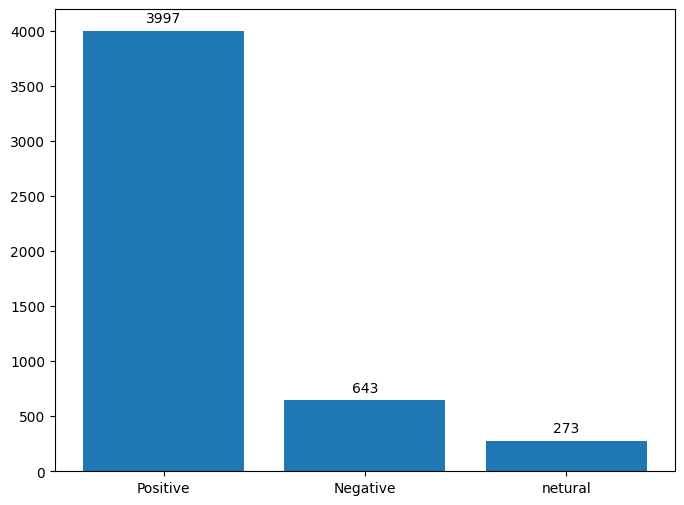

In [137]:
plt.figure(figsize=(8,6))
plt.bar(overall_sentimetn_count.index,overall_sentimetn_count.values)
for i ,value in enumerate(overall_sentimetn_count):
    plt.text(overall_sentimetn_count.index[i],value + 50 ,str(value),ha='center' , va='bottom')

In [199]:
value = overall_sentimetn_count.value_counts().keys()

In [200]:
value

Index([3997, 643, 273], dtype='int64', name='count')

In [201]:
total = sum(value)
percantage = [(i/total)*100 for i in value2]

In [202]:
percantage

[81.355587217586, 13.08772644005699, 5.556686342357012]

In [203]:
percantage_list = []
for i in percantage:
    round_decimal = round(i,1)
    formate_percantage = "{}%".format(round_decimal)
    percantage_list.append(formate_percantage)

In [204]:
percantage_list

['81.4%', '13.1%', '5.6%']

In [205]:
labels = ["Postive","Negative","netural"]

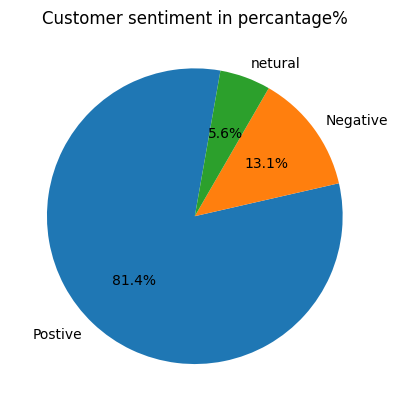

In [206]:
plt.pie(value,autopct="%1.1f%%",startangle=80,labels=labels)
plt.title('Customer sentiment in percantage%')
plt.show()

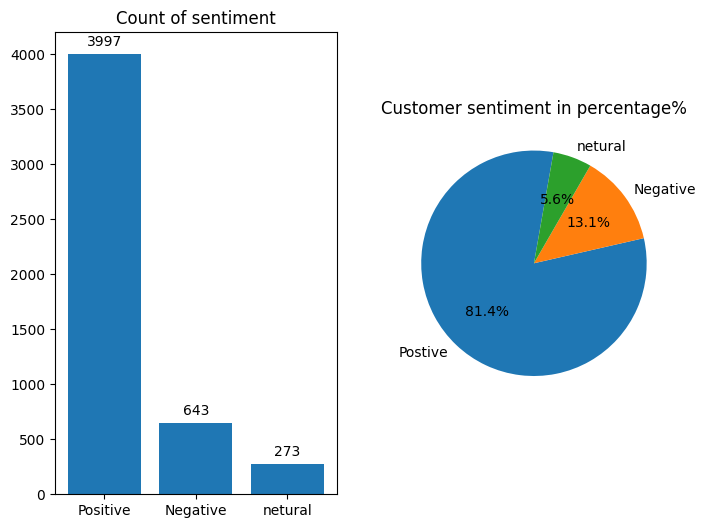

In [275]:
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
plt.bar(overall_sentimetn_count.index,overall_sentimetn_count.values)
plt.title('Count of sentiment')
for i ,value in enumerate(overall_sentimetn_count):
    plt.text(overall_sentimetn_count.index[i],value + 50 ,str(value),ha='center' , va='bottom')


plt.subplot(1,2,2)
value = overall_sentimetn_count.value_counts().keys()
total = sum(value)
percantage = [(i/total)*100 for i in value]

percantage_list = []
for i in percantage:
    round_decimal = round(i,1)
    formate_percantage = "{}%".format(round_decimal)
    percantage_list.append(formate_percantage)

labels = ["Postive","Negative","netural"]
plt.subplot(1,2,2)
plt.pie(value,autopct="%1.1f%%",startangle=80,labels=labels)
plt.title('Customer sentiment in percentage%')
plt.show()



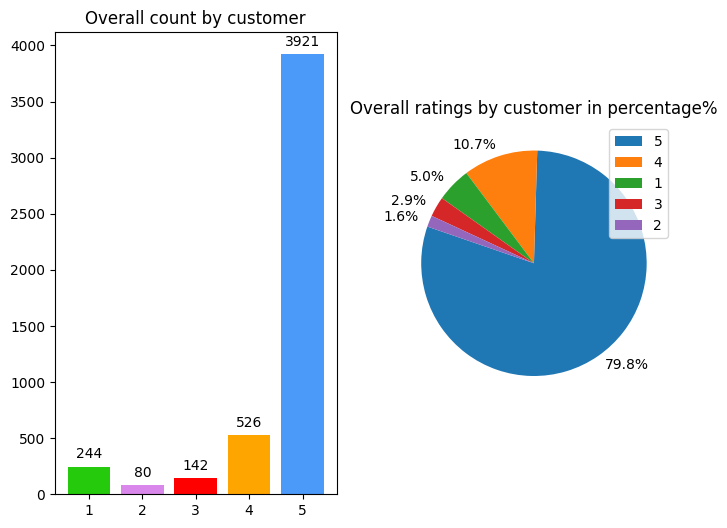

In [274]:
color = ['#4B99F9','orange','#26CA0C','red','#DA87EB']
plt.figure(figsize=(8,6))
overall_count = df2['overall'].value_counts()
plt.subplot(1,2,1)
plt.title('Overall count by customer')
plt.bar(overall_count.index,overall_count.values,color=color)

for i ,value in enumerate(overall_count):
    plt.text(overall_count.index[i],value + 50 ,str(value),ha='center' , va='bottom')


values = overall_count.value_counts().keys()
total = sum(values)
percantage = [(i/total) * 100 for i in values]
percantage_list = []
for i in percantage:
    round_decimal = round(i,1)
    formate_peracanatage = "{}%".format(round_decimal)
    percantage_list.append(formate_peracanatage)
    
plt.subplot(1,2,2)
plt.pie(percantage,labels=percantage_list,startangle=161)
legend_texts = overall_count.index
plt.legend(legend_texts,loc=1)
plt.title("Overall ratings by customer in percentage%")
plt.show()